# Regresión con Árboles de Decisión

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [13]:
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Solo tenemos 10 datos en el dataset.

In [3]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [ ]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

# Escalado de variables

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

# Ajustar la regresión con el dataset

[DecisionTreeRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
regression = DecisionTreeRegressor(random_state = 0)
regression.fit(X, y)

DecisionTreeRegressor(random_state=0)

No pusimos ninguna cota para el número de hojas ni para la cantidad de datos que tiene que contener cada hoja.get_n_leaves()

In [24]:
regression.fit(X, y).get_n_leaves()

10

Se aprecia que el número de hojas o niveles es igual al número de datos que contiene el dataset.

# Predicción de nuestros modelos

In [6]:
y_pred = regression.predict([[6.5]])
print(y_pred)

[150000.]


# Visualización de los resultados del Modelo Polinómico


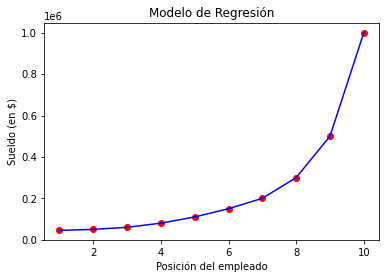

In [26]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Modelo de Regresión")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

Vemos que el modelo pasa por todos los puntos, pero en realidad, no vemos las fronteras de las hojas.

El problema es qué ocurre cuando queremos predecir el salario de un empleado con un nivel mayor a 10.5, por ejemplo 11; habrá problemas.

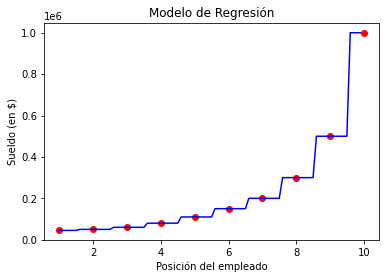

In [12]:
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

Intuitivamente, vemos que las frinteras son los puntos medios entre los puntos del dataset.

[plot.tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

In [8]:
from sklearn import tree

In [14]:
clf = regression.fit(X, y)

In [23]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 8.50
|   |--- feature_0 <= 6.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- value: [45000.00]
|   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |--- value: [50000.00]
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- value: [60000.00]
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- value: [80000.00]
|   |   |--- feature_0 >  4.50
|   |   |   |--- feature_0 <= 5.50
|   |   |   |   |--- value: [110000.00]
|   |   |   |--- feature_0 >  5.50
|   |   |   |   |--- value: [150000.00]
|   |--- feature_0 >  6.50
|   |   |--- feature_0 <= 7.50
|   |   |   |--- value: [200000.00]
|   |   |--- feature_0 >  7.50
|   |   |   |--- value: [300000.00]
|--- feature_0 >  8.50
|   |--- feature_0 <= 9.50
|   |   |--- value: [500000.00]
|   |--- feature_0 >  9.50
|   |   |--- value: [1000000.00]



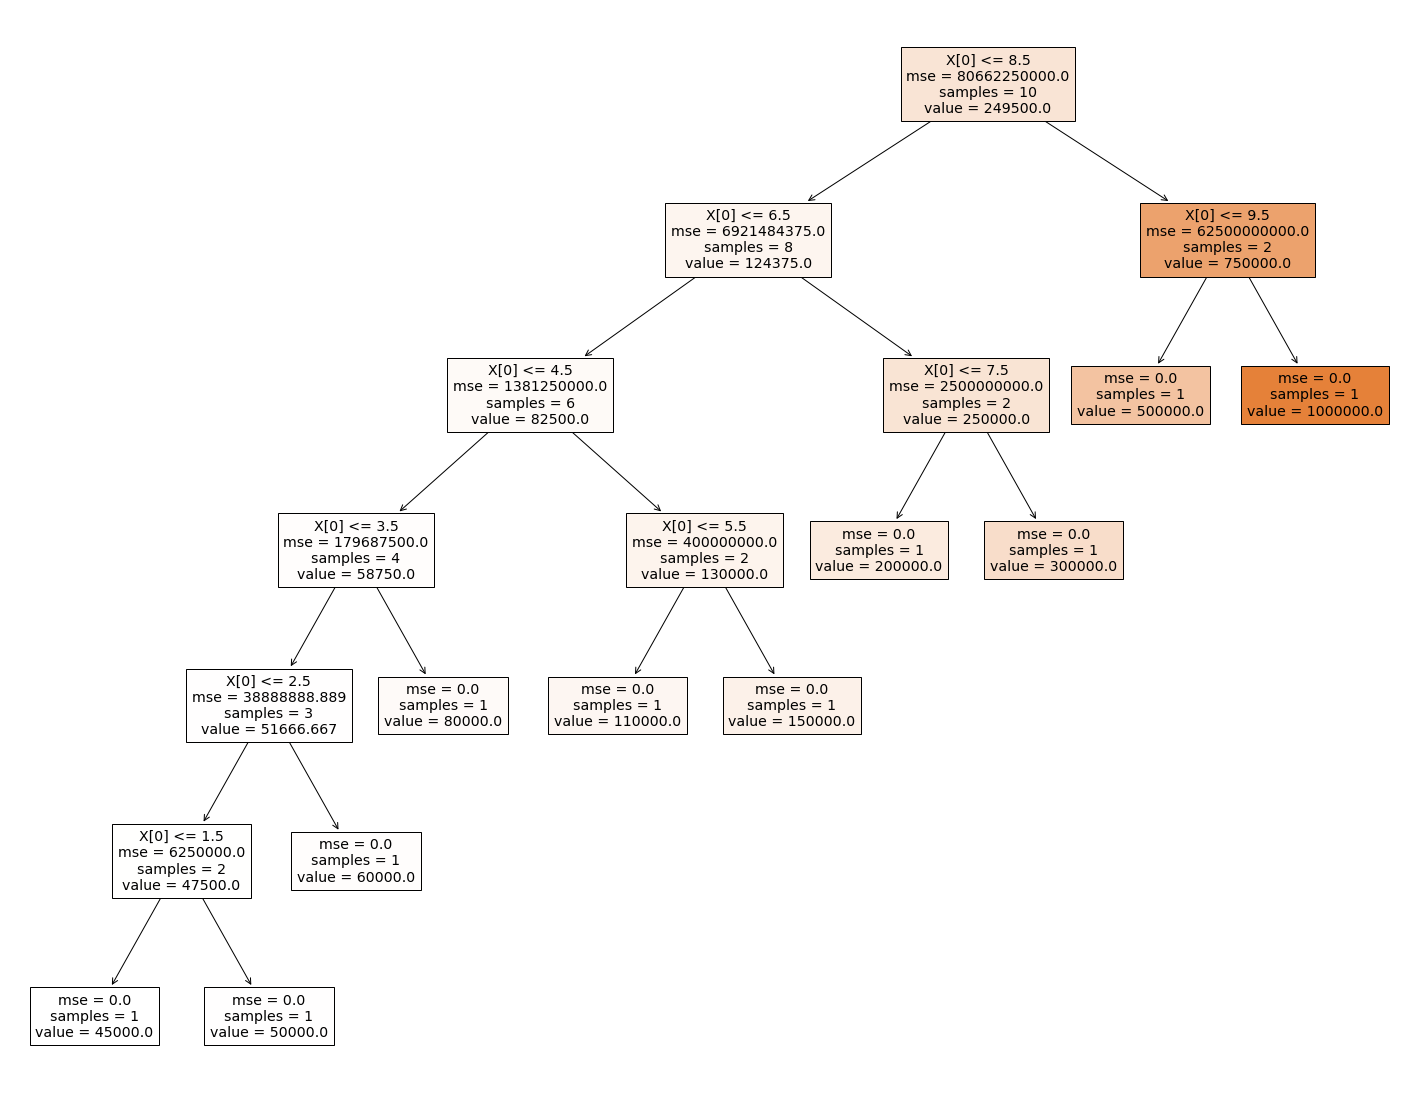

In [22]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(clf, 
                   filled=True)